### Import data

In [1]:
from sklearn.externals import joblib

In [2]:
features_og = joblib.load('../Predicting_Airbnb_Prices/features_og')
features_transformed = joblib.load('../Predicting_Airbnb_Prices/features_transformed')
target = joblib.load('../Predicting_Airbnb_Prices/target')

In [3]:
print(features_og.shape)
print(features_transformed.shape)
print(target.shape)

(31253, 11)
(31253, 18)
(31253,)


### Use the first two PCA components to visualize your data.
* Use your target as your color parameter.

In [4]:
from sklearn.decomposition import PCA

In [5]:
import pandas as pd
import numpy as np

In [6]:
features_og = pd.get_dummies(features_og)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


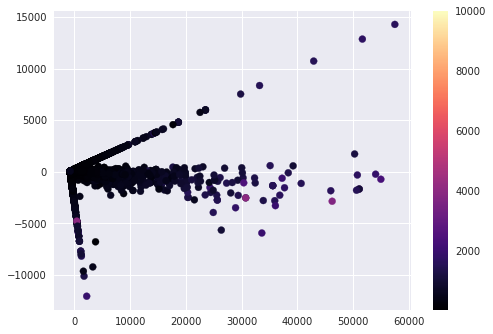

In [8]:
# Try PCA on non-scaled data:
pca = PCA()
features_og_pca = pca.fit_transform(features_og)
plt.scatter(features_og_pca[:,0], features_og_pca[:,1], c=target, cmap='magma')
plt.colorbar()

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


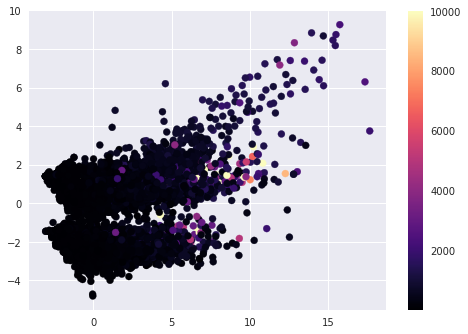

In [9]:
# Try PCA on scaled data:
pca = PCA()
features_transformed_pca = pca.fit_transform(features_transformed)
plt.scatter(features_transformed_pca[:,0], features_transformed_pca[:,1], c=target, cmap='magma')
plt.colorbar()

In [10]:
# The amount of variance explained with each PCA component - 61% of variance in data can be explained with 5 components
np.cumsum(pca.explained_variance_ratio_)[:5]

array([ 0.21702308,  0.3348106 ,  0.44584335,  0.53114955,  0.61166139])

### 4. Train-test-split data

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features_transformed, target, test_size = .3, random_state = 42)

### 5. Import algorithm

In [16]:
# Try a blank benchmark (when you just pick the most frequent class - probability)
from sklearn.dummy import DummyRegressor
dc = DummyRegressor()
dc.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [17]:
print('Dummy Regressor train score: {}'.format(dc.score(X_train, y_train)))
print('Dummy Regressor test score: {}'.format(dc.score(X_test, y_test)))

Dummy Regressor train score: 0.0
Dummy Regressor test score: -0.00010857855372292669


In [20]:
# Try a base KNeighborsRegressor:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [22]:
print('KNeighbors Regressor train score: {}'.format(knr.score(X_train, y_train)))
print('KNeighbors Regressor test score: {}'.format(knr.score(X_test, y_test)))

KNeighbors Regressor train score: 0.5009947211744834
KNeighbors Regressor test score: 0.3818596671133175
